<a href="https://colab.research.google.com/github/zdwhite/Thinkful-Unit-2/blob/master/Dimensionality_Reduction_in_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1.     Use the cell below to create new partial least square regressions with different numbers of components


In [0]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)


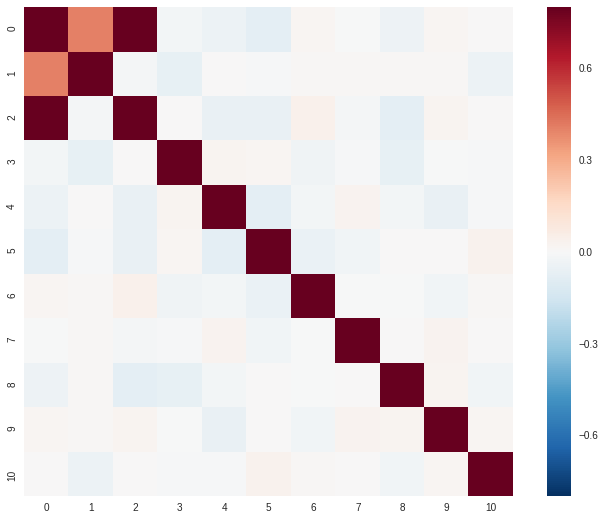

In [89]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8242855765931119
R-squared PLSR:       0.8242855765931119


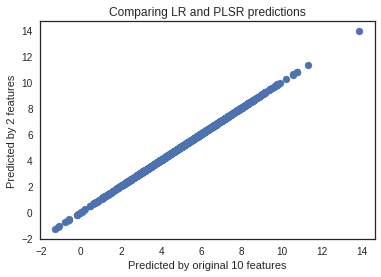

In [90]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=10)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:      ', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

 R-squared PLSR_10: 0.8221036573597231 
 R-squared PLSR_2:  0.8159133975785603


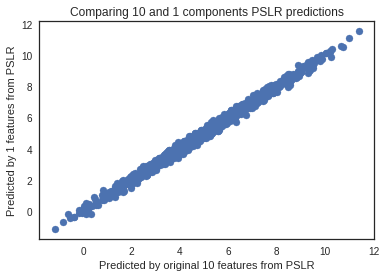

In [51]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 1 dimensions.
pls2 = PLSRegression(n_components=1)

# Reduce X to R(X) and regress on y.
pls2.fit(X, y)

# Save predicted values.
Y_PLS_pred2 = pls2.predict(X)
print(' R-squared PLSR_10:',pls1.score(X, y),'\n','R-squared PLSR_2: ',pls2.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred2) 
plt.xlabel('Predicted by original 10 features from PSLR')
plt.ylabel('Predicted by 1 features from PSLR')
plt.title('Comparing 10 and 1 components PSLR predictions')
plt.show()

 R-squared PLSR_10: 0.8242855765931119 
 R-squared PLSR_2:  0.8242853893358297


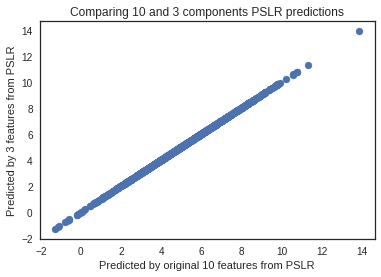

In [91]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls2 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls2.fit(X, y)

# Save predicted values.
Y_PLS_pred2 = pls2.predict(X)
print(' R-squared PLSR_10:',pls1.score(X, y),'\n','R-squared PLSR_2: ',pls2.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred2) 
plt.xlabel('Predicted by original 10 features from PSLR')
plt.ylabel('Predicted by 3 features from PSLR')
plt.title('Comparing 10 and 3 components PSLR predictions')
plt.show()

###2.     Then see how those changes affect the ability of your models to reproduce the predicted Y values as well as the regular linear regression

Looking at the graph above and comparing the R^2 values, the number of components approches the number of total features the R^2 value of PSLR will equal the R2 of our standard linear model. However the R^2 value does not decrese by all that much.

###3.    Play with it by changing how  y  is computed, then observing how different relationships between  yy  and  XX  play out in PLSR.

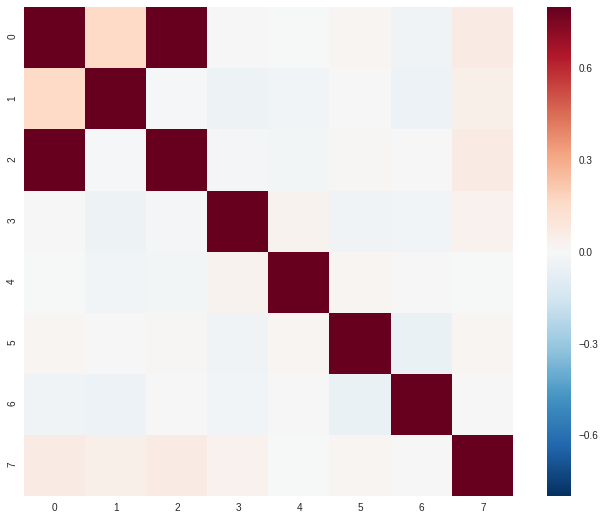

In [83]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 7

# Create random normally distributed data for parameters.
X = np.random.poisson(lam=1,size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 5* X[:, 1] + np.random.poisson(lam=5,size=n * 1) + 7



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()



([array([0.64225, 0.623  , 0.     , 0.33075, 0.     , 0.11725, 0.     ,
         0.0315 , 0.0035 , 0.     , 0.     , 0.     , 0.     , 0.00175]),
  array([0.714  , 0.581  , 0.     , 0.3185 , 0.     , 0.105  , 0.     ,
         0.028  , 0.00175, 0.     , 0.00175, 0.     , 0.     , 0.     ]),
  array([0.69825, 0.644  , 0.     , 0.273  , 0.     , 0.10325, 0.     ,
         0.028  , 0.00175, 0.     , 0.00175, 0.     , 0.     , 0.     ]),
  array([0.63525, 0.66325, 0.     , 0.32025, 0.     , 0.10325, 0.     ,
         0.02275, 0.00525, 0.     , 0.     , 0.     , 0.     , 0.     ]),
  array([0.6265 , 0.6195 , 0.     , 0.37275, 0.     , 0.1015 , 0.     ,
         0.02275, 0.00525, 0.     , 0.00175, 0.     , 0.     , 0.     ]),
  array([0.6615 , 0.637  , 0.     , 0.3115 , 0.     , 0.105  , 0.     ,
         0.02975, 0.0035 , 0.     , 0.00175, 0.     , 0.     , 0.     ]),
  array([0.65975, 0.63175, 0.     , 0.33075, 0.     , 0.098  , 0.     ,
         0.0245 , 0.0035 , 0.     , 0.00175, 0.     

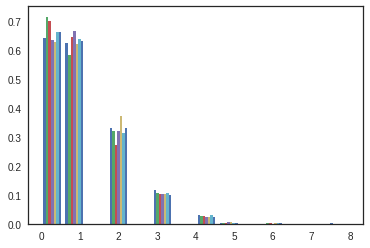

In [84]:
plt.hist(X,14, density=True)

 R-squared PLSR_3: 0.8533662286792606 
 R-squared PLSR_5:  0.8533663432149496


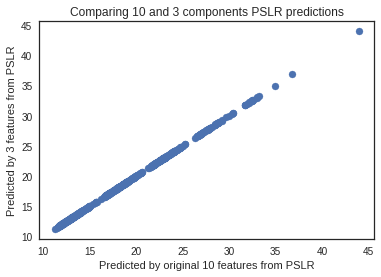

In [85]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred1 = pls1.predict(X)

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls2 = PLSRegression(n_components=5)

# Reduce X to R(X) and regress on y.
pls2.fit(X, y)

# Save predicted values.
Y_PLS_pred2 = pls2.predict(X)
print(' R-squared PLSR_3:',pls1.score(X, y),'\n','R-squared PLSR_5: ',pls2.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_PLS_pred1,Y_PLS_pred2) 
plt.xlabel('Predicted by original 10 features from PSLR')
plt.ylabel('Predicted by 3 features from PSLR')
plt.title('Comparing 10 and 3 components PSLR predictions')
plt.show()

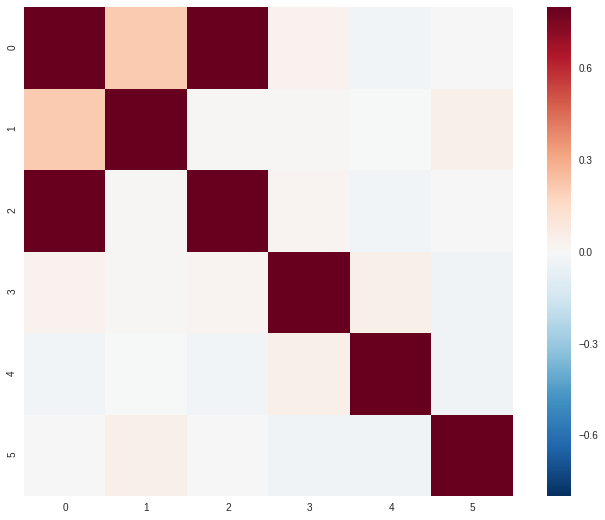

In [86]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 5

# Create random normally distributed data for parameters.
X = np.random.normal(0, 0.1,size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 5* X[:, 1] + np.random.normal(0, 0.1,size=n * 1) + 7



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


 R-squared PLSR_1: 0.9640691072668182 
 R-squared PLSR_5:  0.9654104280322466


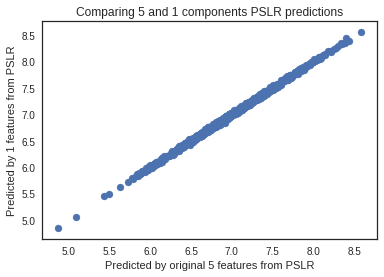

In [87]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 1 dimensions.
pls1 = PLSRegression(n_components=1)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred1 = pls1.predict(X)

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 5 dimensions.
pls2 = PLSRegression(n_components=5)

# Reduce X to R(X) and regress on y.
pls2.fit(X, y)

# Save predicted values.
Y_PLS_pred2 = pls2.predict(X)
print(' R-squared PLSR_1:',pls1.score(X, y),'\n','R-squared PLSR_5: ',pls2.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_PLS_pred1,Y_PLS_pred2) 
plt.xlabel('Predicted by original 5 features from PSLR')
plt.ylabel('Predicted by 1 features from PSLR')
plt.title('Comparing 5 and 1 components PSLR predictions')
plt.show()

After reducing the data to 5 features, comparing the PSLR of 5 features to that of the 1 component PSLR. We can see that the dimmensional reduction has a minimal affect on the accuracy in variance accountance.